In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

**Data not Imbalanced**

In [4]:
# Step 1: Load the shuffled CSV file
df = pd.read_csv('/content/drive/MyDrive/Vistula_BDA/df_train.csv')

In [23]:
df.head()

,ip_is_suspicious,device_is_suspicious,is_short_time,class
0,0,0,0,0
1,0,0,0,0
2,1,1,1,1
3,0,0,0,0
4,0,0,0,0


In [24]:
df.shape

(151112, 4)

In [25]:
df['class'].value_counts()

,count
class,
0,136961
1,14151


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     27373
           1       0.95      1.00      0.97      2850

    accuracy                           1.00     30223
   macro avg       0.98      1.00      0.99     30223
weighted avg       1.00      1.00      1.00     30223


Confusion Matrix: [[27226   147]
 [    0  2850]]


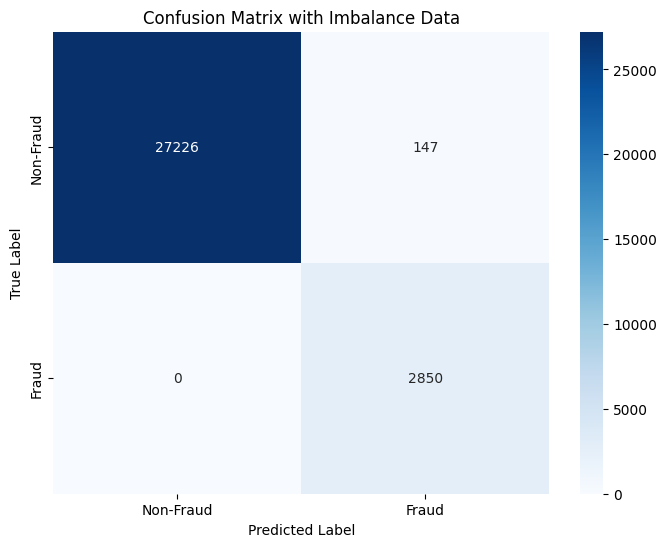

In [5]:
# Step 2: Prepare features and target
X = df[['ip_is_suspicious', 'device_is_suspicious', 'is_short_time']]
y = df['class']

# Step 3: Split the balanced data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:", cm)

# Step 7: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix with Imbalance Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

ROC AUC Score: 0.9973148723194389


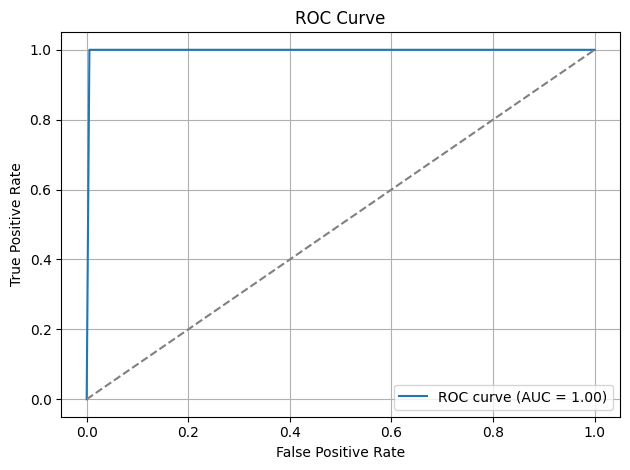

In [6]:
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_score(y_test, y_pred):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Data after Imbalancing process**

(273195, 4)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40704
           1       1.00      1.00      1.00     41255

    accuracy                           1.00     81959
   macro avg       1.00      1.00      1.00     81959
weighted avg       1.00      1.00      1.00     81959


Confusion Matrix: [[40704     0]
 [    0 41255]]


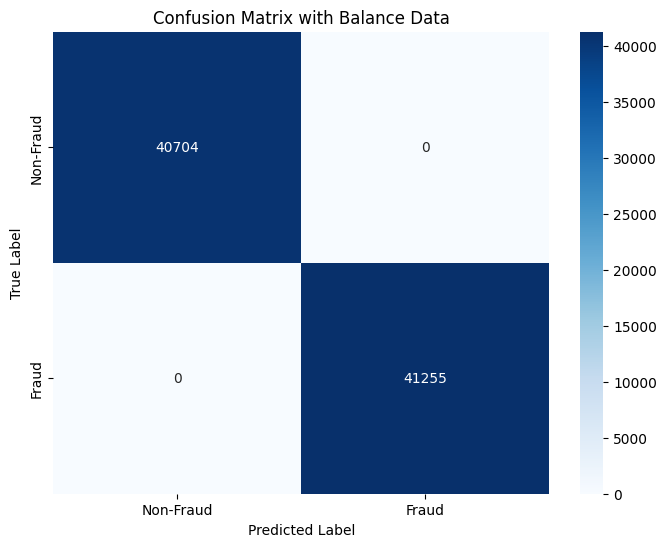

In [8]:
df_b = pd.read_csv('/content/drive/MyDrive/Vistula_BDA/df_train_balanced.csv')
print(df_b.shape)
df.head()
X_b = df_b[['ip_is_suspicious', 'device_is_suspicious', 'is_short_time']]
y_b = df_b['class']
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.3, random_state=42)
rf_model_b = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model_b.fit(X_train_b, y_train_b)
y_pred_b = rf_model.predict(X_test_b)
print("Classification Report:")
print(classification_report(y_test_b, y_pred_b))

cm_b = confusion_matrix(y_test_b, y_pred_b)
print("\nConfusion Matrix:", cm_b)
# Step 7: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_b, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix with Balance Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

ROC AUC Score: 1.0


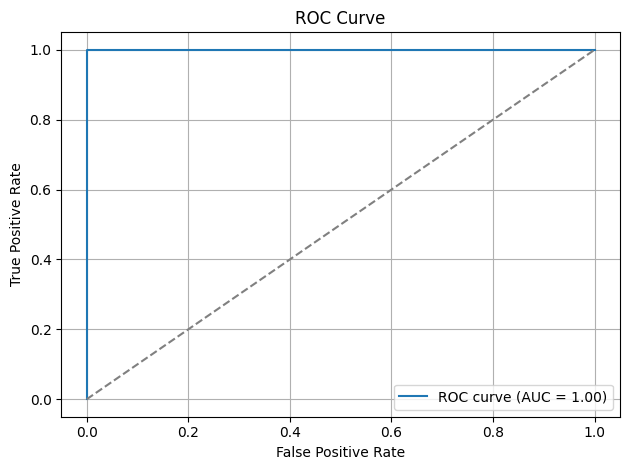

In [9]:
print("ROC AUC Score:", roc_auc_score(y_test_b, y_pred_b))

fpr, tpr, _ = roc_curve(y_test_b, y_pred_b)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_score(y_test_b, y_pred_b):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()